# **Que3**

1. Importing all the libraries and initializing all the given const parameters.

$\mu$ = 80

$\sigma$ = 12

n -> $\infty$

X = test_score

X(random variable) ~ N(80, 12^2)

In [12]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

AVG = 80
STD_DEVIATION = 12
TEST_SCORE = norm(80, 12)

2. We want to find out if a student is in the top ten percent of the class, what is his/her minimum score?

p(X > x) = 1 - p(X < x) = 10/100  $\implies$ F(x) = 90/100

In [13]:
def part1():
    prob = 90/100
    min_score = TEST_SCORE.ppf(prob)
    print("His/Her minimum score is: ", min_score)

In [14]:
part1()

His/Her minimum score is:  95.3786187865352


3. We want to find out What is the range of scores in the second and third quartiles?

0.5 < F(x) < 0.75 $\implies$ F(x1) = 0.5 & F(x2) = 0.75

x1 <= X <= x2: X?

In [15]:
def part2():
    prob_start_range = 0.5
    prob_end_range = 0.75
    score_start_range = TEST_SCORE.ppf(prob_start_range)
    score_end_range = TEST_SCORE.ppf(prob_end_range)
    print(f"The range of scores inbetween quartile 2 and 3 is: [{score_start_range}, {score_end_range}]")

In [16]:
part2()

The range of scores inbetween quartile 2 and 3 is: [80.0, 88.09387700235298]


4. We want to find out What is the probability that the score is between 80 and 90?

p(80 < X < 90) = F(90) - F(80) = ?



In [17]:
def part3():
    score_start_range = 80
    score_end_range = 90
    prob_start_range = TEST_SCORE.cdf(score_start_range)
    prob_end_range = TEST_SCORE.cdf(score_end_range)
    prob = prob_end_range - prob_start_range
    print(f'The probability of scores being between 80 and 90 is: {prob}')

In [18]:
part3()

The probability of scores being between 80 and 90 is: 0.29767161903635686


5. central limit theory

phisycs $\approx$ U(40, 80)  ->  E = (80+40)/2 = 60

AP $\approx$ exp(1/60) -> E = 1/(1/60) = 60

DM $\approx$ Poi(60) -> E = 60

in range (0,120) I'll calculate the sum of the probabilities to see wether it's graph be like a Noramal distribution's graph

In [19]:
def part4():
    size = 50000
    physics = np.random.uniform(40, 80, size=size)
    ap = np.random.exponential(1/60, size=size)
    dm = np.random.poisson(60, size=size)
    sum_random_variable = physics + ap + dm

    # calculate the average and the standard deviation
    exp = np.mean(sum_random_variable)
    var = np.var(sum_random_variable, ddof=1)
    std_dev = np.std(sum_random_variable, ddof=1)
    norm_approximated_samples = np.linspace(80, 180, size)
    print(f'variance: {var}',  f'expectation: {exp}', f'standard deviation: {std_dev}', sep='\n')

    # make figure
    plt.figure()
    plt.hist(sum_random_variable, density=True, bins=30, color='g', label='Sum of Random Variables')
    plt.plot(norm_approximated_samples, norm.pdf(norm_approximated_samples, exp, std_dev), color='r', label='normal approximated')
    plt.xlabel('numbers')
    plt.ylabel('density')
    plt.legend()
    plt.show()

variance: 194.0143683593222
expectation: 120.03561592508964
standard deviation: 13.928904061674134


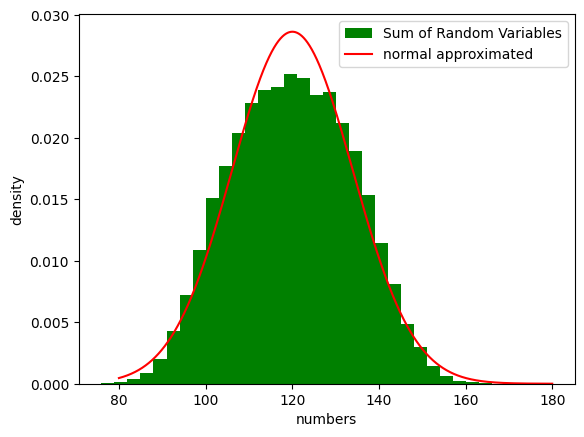

In [20]:
part4()

I made a Normal Distribution using the standard deviation and expectation and comparing it to the original sum that was calculated from the Poisson, Uniform, and Exponential distributions shows us and it gives us a great intuition of the told theory that;

 we can sum all distributions in a large scale and independent from each other and the result can be approximated by a Normal distribution